In [26]:
from helpers import *
from tqdm import notebook

In [27]:
def runsims(alpha = 0.95, num_sim=1, temp = 10, stopK = 0.000001, element="swap"):
    sim = AnnealTVS(df, K = temp, stopK = stopK, alpha = alpha, elementary=element, num_sim = num_sim)
    res = sim.run_sim()
    return res

def plot_solution(solution, df):
    df.plot.scatter("x", "y")
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [28]:
def get_distance(x1, y1, x2, y2) :
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)

def total_distance(solution, df):
    distance = 0
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        # print(fro)
        to = df.loc[solution[i+1]]
        distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
        # print(distance)
     # make it a circle
    fro = df.loc[solution[len(solution)-1]]
    to = df.loc[solution[0]]
    distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    return distance

In [29]:
df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = r"[ ]{1,}", index_col=0).drop("EOF")
# df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

<ipython-input-29-f409b169b928>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = r"[ ]{1,}", index_col=0).drop("EOF")


In [5]:
df.loc["1"]

x    288.0
y    149.0
Name: 1, dtype: float64

In [38]:
sim = AnnealTVS(df, K = 10, num_sim=1,num_searches = 200,stopK = .1, alpha = 0.97, beta = 0.2, gamma = 0.5,
                elementary="2opt", verbose=False, alternate=True, secondary="insert")

In [39]:
total_distance(sim.solution,df)

3160.500278080935

In [40]:
sim.total_distance()

3160.500278080935

In [41]:
matrix = np.zeros((len(df),len(df)))
for row in range(len(df)):
    # print(row)
    fro = df.loc[f"{row+1}"]
    # print(fro)
for column in range(len(df)):
    if row != column:
        to = df.loc[f"{column+1}"]
        matrix[row][column] = get_distance(fro["x"], fro["y"], to["x"], to["y"])

In [42]:
matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [17.88854382,  8.94427191, 10.        , ..., 29.12043956,
        20.39607805,  0.        ]])

In [43]:
sim.dist_matrix

array([[ 0.        , 20.        , 24.08318916, ..., 43.26661531,
        34.40930107, 17.88854382],
       [20.        ,  0.        , 18.43908891, ..., 36.22154055,
        28.        ,  8.94427191],
       [24.08318916, 18.43908891,  0.        , ..., 19.6977156 ,
        10.77032961, 10.        ],
       ...,
       [43.26661531, 36.22154055, 19.6977156 , ...,  0.        ,
         8.94427191, 29.12043956],
       [34.40930107, 28.        , 10.77032961, ...,  8.94427191,
         0.        , 20.39607805],
       [17.88854382,  8.94427191, 10.        , ..., 29.12043956,
        20.39607805,  0.        ]])

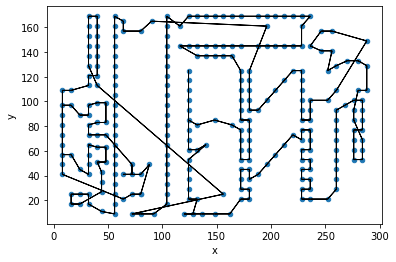

In [44]:
sim.plot_solution()

In [45]:
res = sim.run_sim()

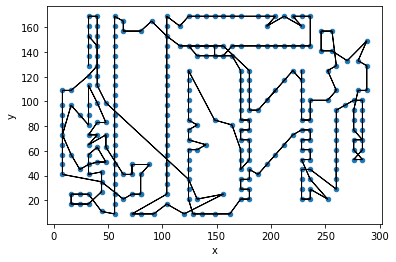

In [46]:
sim.plot_solution()

In [47]:
sim.total_distance()

3297.1820415765496

In [48]:
num_sims = 16
results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 2, temp=i*10, stopK=.01, alpha = 0.99, element="2opt")
                                      for i in range(num_sims))

In [49]:
best_solution = []
best = 1000000
for i in range(len(results_sims)):
    for j in range(len(results_sims[i])):
        distance = total_distance(results_sims[i][j], df)
        if distance < best:
            # update shortest distance
            best = distance
            # store best solution
            best_solution = results_sims[i][j]
            
        # print(total_distance(results_sims[i][j], df))

print(total_distance(best_solution, df))

3215.8545762837484


In [50]:
print(best_solution)

['90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '173', '174', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '108', '110', '111', '114', '113', '87', '84', '83', '82', '81', '80', '79', '76', '75', '74', '73', '72', '71', '70', '67', '66', '65', '64', '63', '62', '118', '61', '60', '43', '42', '41', '40', '39', '38', '37', '36', '35', '34', '33', '31', '30', '125', '124', '123', '122', '121', '120', '119', '157', '158', '159', '160', '175', '181', '176', '177', '151', '152', '156', '153', '155', '154', '129', '128', '21', '20', '19', '18', '17', '133', '132', '131', '130', '127', '126', '29', '28', '27', '26', '22', '25', '23', '24', '14', '13', '12', '11', '10', '8', '7', '9', '275', '274', '273', '272', '271', '16', '15', '270', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '178', '179', '180', '182', '183',

In [51]:
# df = pd.read_csv("data/eil51.opt.tour.txt", skiprows=5, names=["cities"], header=None, delimiter = ' ', index_col=0).drop("EOF")
df = pd.read_csv("data/a280.opt.tour.txt", skiprows=5, names=["cities"], header=None, delimiter = ' ', index_col=0)
opt_tour = []
for index, row in df.iterrows():
    opt_tour.append(str(index))
opt_tour.pop()
print(opt_tour)


# df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")
df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = r"[ ]{1,}", index_col=0).drop("EOF")
print(total_distance(opt_tour, df))


['2', '242', '243', '244', '241', '240', '239', '238', '237', '236', '235', '234', '233', '232', '231', '246', '245', '247', '250', '251', '230', '229', '228', '227', '226', '225', '224', '223', '222', '221', '220', '219', '218', '217', '216', '215', '214', '213', '212', '211', '210', '207', '206', '205', '204', '203', '202', '201', '198', '197', '196', '195', '194', '193', '192', '191', '190', '189', '188', '187', '186', '185', '184', '183', '182', '181', '176', '180', '179', '150', '178', '177', '151', '152', '156', '153', '155', '154', '129', '130', '131', '20', '21', '128', '127', '126', '125', '124', '123', '122', '121', '120', '119', '157', '158', '159', '160', '175', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '172', '171', '173', '174', '107', '106', '105', '104', '103', '102', '101', '100', '99', '98', '97', '96', '95', '94', '93', '92', '91', '90', '89', '109', '108', '110', '111', '112', '88', '87', '113', '114', '115', '117', '116', '86', '85', '84

<ipython-input-51-b734f01d1081>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = r"[ ]{1,}", index_col=0).drop("EOF")


## TO-DO LIST FOR PAPER:
1. Plot that compares different elementary strategies. All elementary strategies share the same parameters, except for the main strategy, i.e. swap, insert, 2-opt, etc.
Idea could be to run each elementary strategy 100 times. For each elementary strategy we then have a best tour, and we can make distribution plots of the mean tour lengths and compare these distributions (as we did in assignment 2). First, test how a distribution of e.g. 100 runs looks like.

2. Compare the outcomes of different starting temperatures, all other params equal (for our optimal elementary+secondary strategy, probably 2opt+something). We could make a plot comparing several starting temperatures, and how the length of the tour (i.e. cost) goes down over the iterations. I.e. Y axis is tour length, X axis is iterations.

3. Compare the outcomes of different cooling schedules, i.e. different alphas, all other params equal (for our optimal elementary+secondary strategy, probably 2opt+something). We could make a plot comparing several starting cooling schedules, and how the length of the tour (i.e. cost) goes down over the iterations. I.e. Y axis is tour length, X axis is iterations.

4. What would be really nice is to make some 3D plots, assessing the overall optimal combination of cooling schedule + starting temp vs. the tour length. Sometihng like Y-axis tour length, X-axis cooling schedule, Y-axis starting temp, and then plot the points. 

In [ ]:
# num_sims = 8
# results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i, stopK=.1, element="2opt")
#                                       for i in range(num_sims))

In [ ]:
# total_distance(results_sims[0][0], df)

In [ ]:
# for i in range(len(results_sims)):
#     for j in range(len(results_sims[i])):
#         print(total_distance(results_sims[i][j], df))

In [ ]:
# num_sims = 8
# results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 10, temp=i*10, stopK=.1, alpha = 0.9, element="insert")
#                                       for i in range(num_sims))

In [ ]:
# for i in range(len(results_sims)):
#     for j in range(len(results_sims[i])):
#         print(total_distance(results_sims[i][j], df))

In [ ]:
# num_sims = 8
# results_sims= Parallel(n_jobs=8)(delayed(runsims)(num_sim = 1, temp=i*10, stopK=.01, alpha = 0.99, element="insert")
#                                       for i in range(num_sims))

In [ ]:
# best_solution:
# for i in range(len(results_sims)):
#     for j in range(len(results_sims[i])):
#         print(total_distance(results_sims[i][j], df))